In [1]:
#x = {'sigma_psi': 0.25,'sigma_psi_init': 2.332155241562433,'pmeet_21': 0.30325973411684065,'pmeet_28': 0.7329390078838265,'pmeet_35': 1.0,'preg_21': 0.017160684393485684,'preg_28': 0.03733205098574577,'preg_35': -0.0014982571526763744,'u_shift_mar': 1.1123578939396237,'util_alp': 0.3061592839066737,'util_kap': 0.8512902458486851,'util_qbar': 1.1171096340029305,'disutil_marry_sm_mal': 64.12382814306783,'disutil_shotgun': 5.78268701428576,'abortion_costs': 30.926325607734366,'p_abortion_access': 0.9916006844636375,'u_lost_divorce': 6.555383565811324}
#from estimates import get_point
#x, targ_mode = get_point(True,read_wisdom=True)

In [2]:
#from model import Model
#mdl = Model(verbose=True,**x)
#mdl_list = [mdl]
#mdl_list[0].time_statistics()

In [3]:
from importlib import reload
#import simulations
#import numpy as np
#reload(simulations)
#Agents = simulations.Agents
#np.random.seed(18)
#agents = Agents( mdl_list, verbose=True, fix_seed=False)
#moments_list = [agents.compute_moments()]
#mom = {key : np.mean([m[key] for m in moments_list]) for key in moments_list[0].keys()}



In [4]:
#from targets import target_values
#from residuals import distance_to_targets
#tar = target_values()
#resid_all, resid_sc, dist = distance_to_targets(mom,tar,weights={},
#                                                    report=True)
#print('Distance is {}'.format(dist))

In [5]:
#mdl_list[0].time_statistics()

Hi!
Hi!
read wisdom from file!
{'sigma_psi': 0.16136767792390036, 'sigma_psi_init': 0.4010208685827063, 'pmeet_21': 0.20815782586301726, 'pmeet_30': 0.6440804929559171, 'pmeet_40': 0.6291027200795182, 'preg_21': -0.0015899073426055288, 'preg_28': 0.027347501390003724, 'preg_35': -0.0822689586251608, 'u_shift_mar': 0.2744273906090489, 'util_alp': 0.545255526706075, 'util_kap': 9.936056567049064, 'util_qbar': 13.67218401631941, 'disutil_marry_sm_mal': 10.0, 'disutil_shotgun': 3.375529066732822, 'abortion_costs': 8.650019029052215, 'p_abortion_access': 0.5252359614834747, 'u_lost_divorce': 4.439975797482218, 'mu_psi_init': -0.1862170395970355}
saved distance is 0.010287659965265086
using cupy!
{'sigma_psi': 0.16136767792390036, 'sigma_psi_init': 0.4010208685827063, 'pmeet_21': 0.20815782586301726, 'pmeet_30': 0.6440804929559171, 'pmeet_40': 0.6291027200795182, 'preg_21': -0.0015899073426055288, 'preg_28': 0.027347501390003724, 'preg_35': -0.0822689586251608, 'u_shift_mar': 0.2744273906090

/projects/p30190/py_shotgun/simulations.py:550: RuntimeWarning: invalid value encountered in long_scalars
  self.share_aborted[t] = 100*n_abortions / (n_abortions + n_kept)


for sname = Female, single: 0 mar, 687 coh,  2363 disagreed, 11674 did not meet (14724 total)
At t = 1 count of Female and child is 276
for sname = Female and child: 6 mar, 0 coh,  59 disagreed, 211 did not meet (276 total)
Simulations, iteration took 0.64, total 31.47, mem 2.95G
At t = 1 for Female and child 23 have LS of 0.2
At t = 1 for Female and child 247 have LS of 1.0
At t = 1 for Couple, no children 687 have LS of 1.0
At t = 1 for Couple and child 2 have LS of 0.2
At t = 1 for Couple and child 4 have LS of 1.0
At t = 2 count of Female, single is 14037
1 abortions done at t = 1 for Female, single
9 abortions refused at t = 1 for Female, single
for sname = Female, single: 29 mar, 914 coh,  3268 disagreed, 9826 did not meet (14037 total)
At t = 2 count of Female and child is 270
for sname = Female and child: 7 mar, 0 coh,  81 disagreed, 182 did not meet (270 total)
At t = 2 count of Couple, no children is 687
At t = 2 count of Couple and child is 6
Simulations, iteration took 0.61

for sname = Female, single: 0 mar, 539 coh,  2115 disagreed, 1214 did not meet (3868 total)
At t = 13 count of Female and child is 935
for sname = Female and child: 57 mar, 0 coh,  567 disagreed, 311 did not meet (935 total)
At t = 13 count of Couple, no children is 3064
At t = 13 count of Couple and child is 7133
At t = 13 for Female and child 68 have LS of 0.2
At t = 13 for Female and child 897 have LS of 1.0
At t = 13 for Couple, no children 2894 have LS of 1.0
At t = 13 for Couple and child 2326 have LS of 0.2
At t = 13 for Couple and child 5418 have LS of 1.0
At t = 14 count of Female, single is 3397
for sname = Female, single: 0 mar, 528 coh,  1695 disagreed, 1174 did not meet (3397 total)
At t = 14 count of Female and child is 965
for sname = Female and child: 81 mar, 0 coh,  566 disagreed, 318 did not meet (965 total)
At t = 14 count of Couple, no children is 2894
At t = 14 count of Couple and child is 7744
At t = 14 for Female and child 71 have LS of 0.2
At t = 14 for Female a

At t = 29 count of Female, single is 792
At t = 29 count of Female and child is 1484
At t = 29 count of Couple, no children is 987
At t = 29 count of Couple and child is 11737
Maximum savings for Female, single is 500.0
Maximum savings for Female and child is 500.0
Maximum savings for Couple, no children is 1000.0
Maximum savings for Couple and child is 1000.0
Assets upped bound is reached for singles
Rejected: 0.7848829210577003, planned preg: 0.9136535348084188
Anything: divorced k_m = 0.1071619659099595, divorced m_k = 0.03867403314917127
One mar: divorced k_m = 0.11438886932018316, divorced m_k = 0.03633775380235259
Ever divorced upp = 0.18604651162790697, ever divorced nupp = 0.14097392306584067
Ever divorced ever km = 0.384, ever divorced never km = 0.12014678899082569
std of earnings is 0.5082308650016785 at 24 and 0.6339689493179321 at 30 for males
std of earnings is 0.5507615208625793 at 24 and 0.6993635296821594 at 30 for females
Coefficients are 0.19826358983976097 at 25 and

divorced if k then m and one marriage: base 0.11968033891777392, compare 0.1480121
divorced by years after marriage if kids first, 10: base 0.206825126497711, compare 0.20118
divorced if m then k and one marriage: base 0.04264930412712713, compare 0.0536316
divorced by years after marriage if marriage first, 10: base 0.05446142841781665, compare 0.0602147


/projects/p30190/py_shotgun/fit_plot.py:252: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[0,0])


('KF', array([0.01645233, 0.03240324, 0.0576331 , 0.08828958, 0.11957976,
       0.14098901, 0.16299398, 0.18241319, 0.19517264, 0.20682513]))
('MF', array([0.        , 0.0048245 , 0.01087728, 0.01529748, 0.02244024,
       0.02896523, 0.03615316, 0.04364578, 0.04973487, 0.05446143]))
failed to plot single moms (new)
failed to plot welfare
failed to plot ref


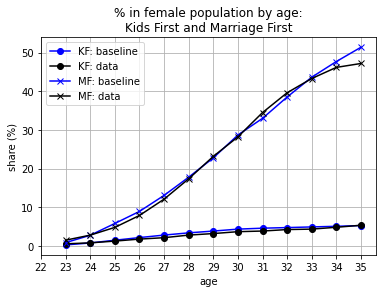

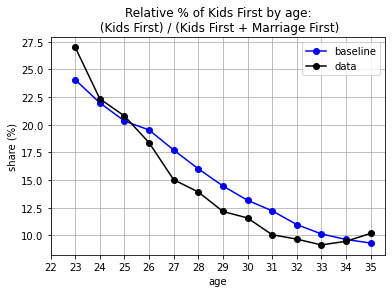

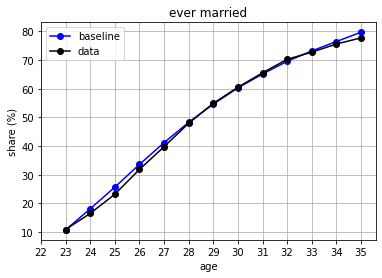

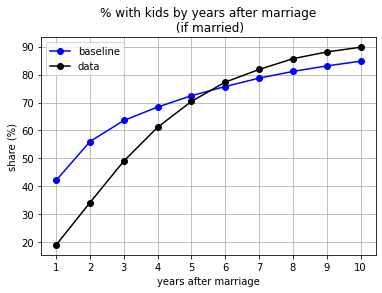

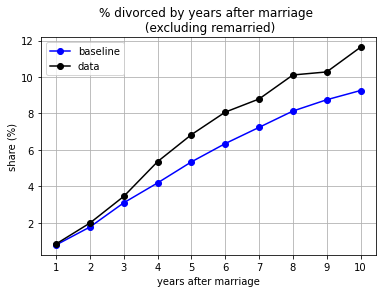

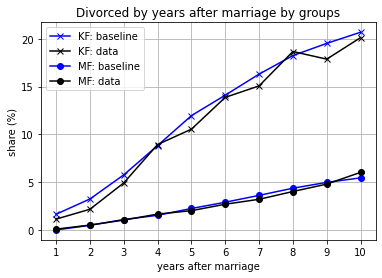

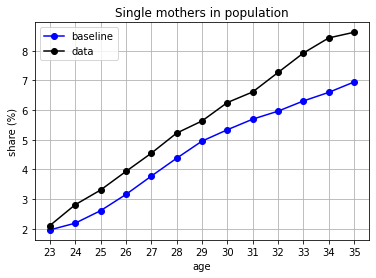

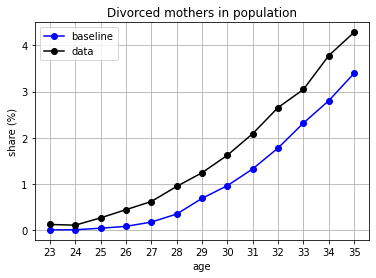

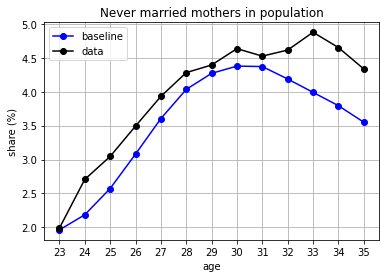

(7, 15)
(7, 15)
(7, 1, 3, 5)
(50, 7, 5, 15, 1)
(50, 7, 5, 15, 11)
(7, 1, 3, 5)
(50, 7, 5, 15, 1)
(50, 7, 5, 15, 11)


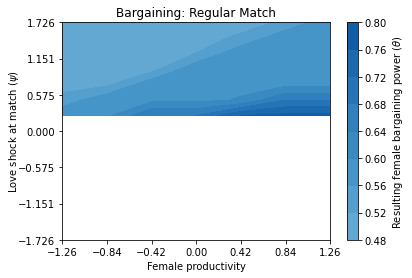

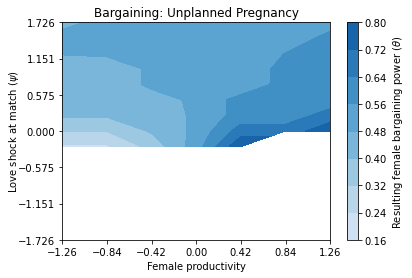

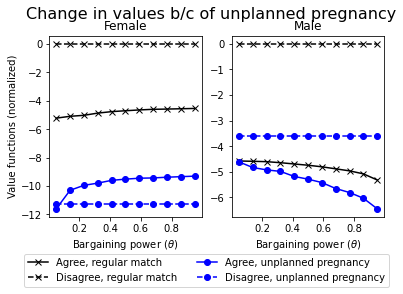

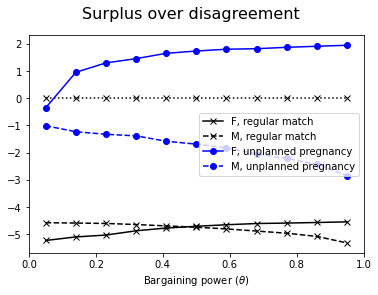

In [6]:
import main_onerun
reload(main_onerun)
main = main_onerun.main

outs = main(read_wisdom=True,erase=False)